In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [3]:
x_train.dtype

dtype('uint8')

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# 标准化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# one hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
x_train_scaled.mean()

5.1098400794094047e-14

In [9]:
x_train_scaled.std()

0.956316274213992

In [12]:
x_test_scaled.std()

0.9570683370942685

In [14]:
x_train_scaled.shape

(60000, 784)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
         -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
         -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
         -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
         -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
         -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
          0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
          2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
          4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
          6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
          8. ,   8.2,   8.4,   8.6,   8.8

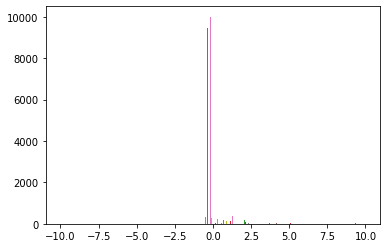

In [15]:
plt.hist(x_test_scaled, bins=100, range=[-10, 10])

In [17]:
from tensorflow.keras.layers import Dense

In [27]:
# 定义网络
model = tf.keras.Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 配置
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [22]:
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
938/938 [==============================] - 8s 4ms/step - loss: 0.3283 - acc: 0.9047 - val_loss: 0.1948 - val_acc: 0.9397
Epoch 2/20
938/938 [==============================] - 3s 4ms/step - loss: 0.1460 - acc: 0.9567 - val_loss: 0.1259 - val_acc: 0.9616
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1044 - acc: 0.9689 - val_loss: 0.1021 - val_acc: 0.9685
Epoch 4/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0821 - acc: 0.9746 - val_loss: 0.0976 - val_acc: 0.9703
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0657 - acc: 0.9792 - val_loss: 0.0957 - val_acc: 0.9704
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0552 - acc: 0.9827 - val_loss: 0.0989 - val_acc: 0.9713
Epoch 7/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0477 - acc: 0.9850 - val_loss: 0.0960 - val_acc: 0.9721
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.

In [29]:
# 从训练过程可以观察, 使用了标准化处理的数据, 更快收敛. 
history = model.fit(x_train_scaled, y_train, batch_size=64, epochs=20, validation_data=(x_test_scaled, y_test))

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2785 - acc: 0.9175 - val_loss: 0.1449 - val_acc: 0.9589
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1139 - acc: 0.9650 - val_loss: 0.1307 - val_acc: 0.9631
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0787 - acc: 0.9758 - val_loss: 0.1139 - val_acc: 0.9671
Epoch 4/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0599 - acc: 0.9809 - val_loss: 0.1323 - val_acc: 0.9687
Epoch 5/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0462 - acc: 0.9852 - val_loss: 0.1230 - val_acc: 0.9708
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0361 - acc: 0.9884 - val_loss: 0.1352 - val_acc: 0.9707
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0310 - acc: 0.9899 - val_loss: 0.1328 - val_acc: 0.9710
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.

In [31]:
history.history

{'loss': [0.27851974964141846,
  0.11393164843320847,
  0.07871301472187042,
  0.059866465628147125,
  0.04620717465877533,
  0.03608178719878197,
  0.031042862683534622,
  0.027131633833050728,
  0.023914018645882607,
  0.023681839928030968,
  0.01576872356235981,
  0.013811157085001469,
  0.018834402784705162,
  0.017809279263019562,
  0.015011442825198174,
  0.009812971577048302,
  0.012554268352687359,
  0.010120362974703312,
  0.010437837801873684,
  0.013616315089166164],
 'acc': [0.9175333380699158,
  0.9650499820709229,
  0.9757999777793884,
  0.98089998960495,
  0.9852499961853027,
  0.9884333610534668,
  0.9899166822433472,
  0.990933358669281,
  0.9920333623886108,
  0.9926166534423828,
  0.9951000213623047,
  0.9952333569526672,
  0.9936166405677795,
  0.9944166541099548,
  0.9953833222389221,
  0.9968833327293396,
  0.9960166811943054,
  0.9964333176612854,
  0.9965000152587891,
  0.995983362197876],
 'val_loss': [0.14487293362617493,
  0.13070951402187347,
  0.11392103135

In [32]:
import pandas as pd

<AxesSubplot:>

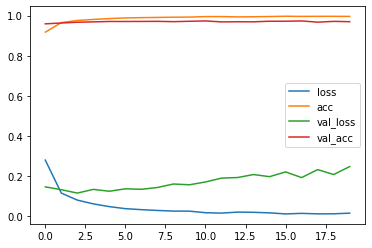

In [33]:
pd.DataFrame(history.history).plot()